In [1]:
import kagglehub
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')


/home/mahindra/.pyenv/versions/my-recommender-env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Download latest version
path = kagglehub.dataset_download("nelgiriyewithana/new-york-housing-market")
print("Path to dataset files:", path)
df = pd.read_csv(f"{path}/NY-House-Dataset.csv")
df.head()


Path to dataset files: /home/mahindra/.cache/kagglehub/datasets/nelgiriyewithana/new-york-housing-market/versions/1


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [3]:
df.info()
# target variable is price

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

## EDA

In [4]:
df.head(5)
# remove columns [BrokerTitle, Address, State, Main_address, 
# Adnubustrative_area_level_2, Street_name, Logname, Formatted_address, latitute, longitude]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


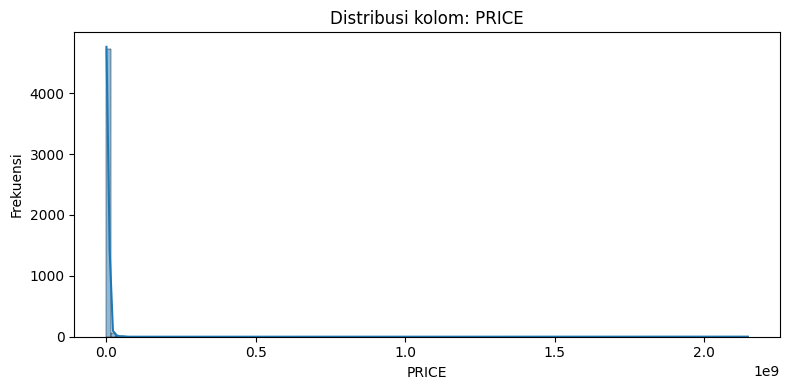

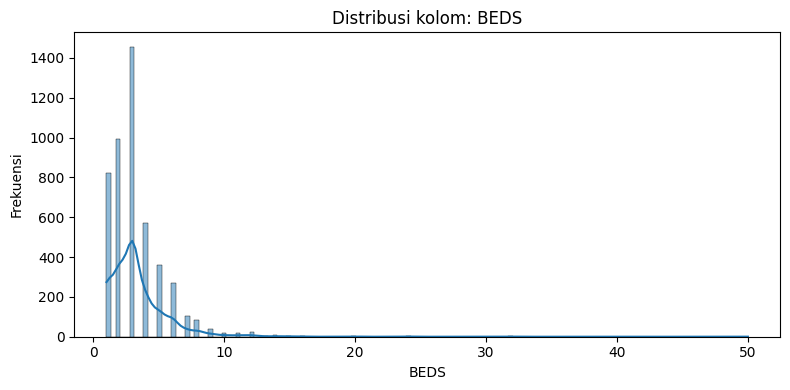

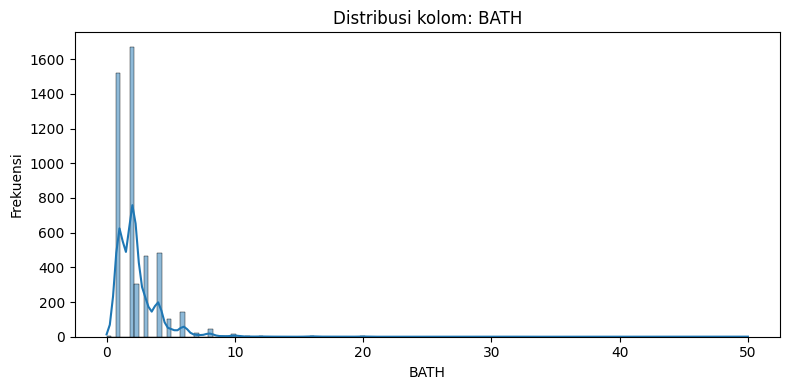

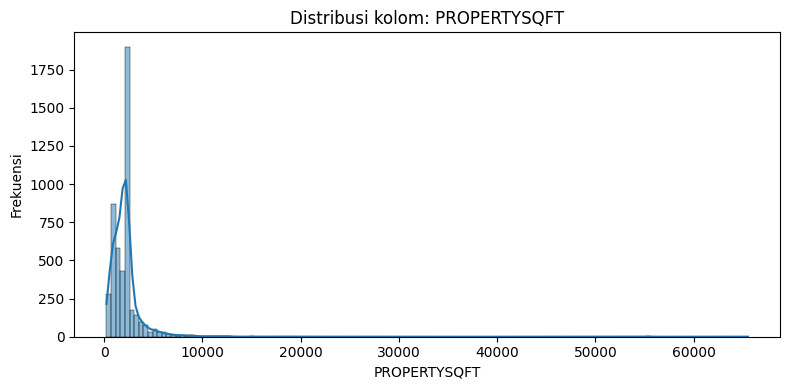

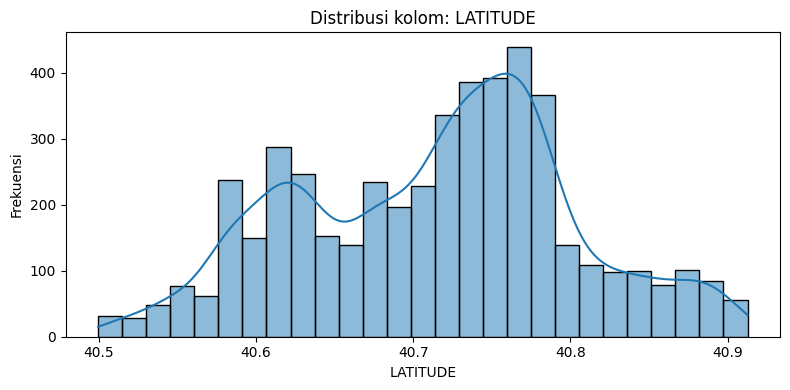

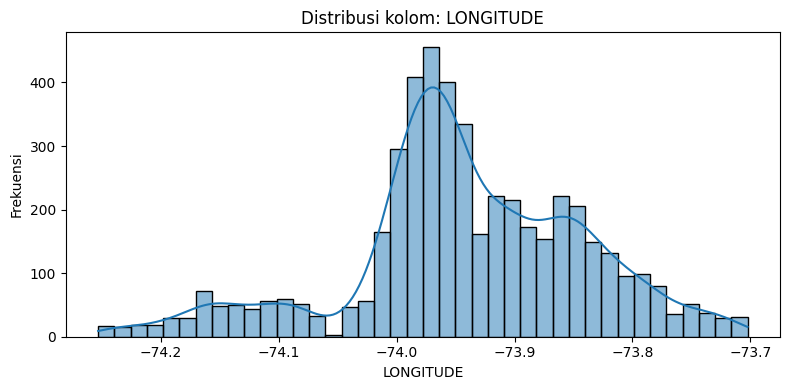

In [5]:
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi kolom: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()


In [6]:
df['PRICE'].sort_values(ascending=True).head(10)
# 304, 1, 317, 310, 360 463 outliers

317      2494
310      3225
360      5800
463     49500
979     60000
188     65000
3       69000
252     69000
132     69900
4003    75000
Name: PRICE, dtype: int64

In [7]:
df['BEDS'].sort_values(ascending=False).head(10)
# remove outlier beds [1143, 2653, 3276,2488,765,2265,3589,3603,4240,2564,1092,1410,1214,750,4191,4404]

1143    50
2653    42
3276    40
2488    36
765     35
2265    32
3589    32
3603    30
1092    24
4240    24
Name: BEDS, dtype: int64

In [8]:
df['PROPERTYSQFT'].sort_values(ascending=False)
#drop values outlier [4623,2146,2148,823,3130,141,2932,2054,917,1823,4353,2107,69,4,2171]

4623    65535.0
2146    55300.0
2148    55300.0
823     48000.0
7       33000.0
         ...   
1494      260.0
332       250.0
2166      250.0
4693      246.0
188       230.0
Name: PROPERTYSQFT, Length: 4801, dtype: float64

In [9]:
df['LOCALITY'].unique()

array(['New York', 'New York County', 'The Bronx', 'Kings County',
       'Bronx County', 'Queens County', 'Richmond County',
       'United States', 'Brooklyn', 'Queens', 'Flatbush'], dtype=object)

## Feature Engineering

In [10]:
# drop value 
df.drop([304, 1, 317, 310, 360, 463], inplace=True)  # PRICE outliers
df.drop([1143, 2653, 3276,2488,765,2265,3589,3603,4240,2564,1092,1410,1214,750,4191,4404], inplace=True)  # BEDS outliers
df.drop([4623,2146,2148,823,3130,141,2932,2054,917,1823,4353,2107,69,4,2171], inplace=True)  # PROPERTYSQFT outliers

In [11]:
df.head(5)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.0,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
2,Brokered by Sowae Corp,House for sale,260000,4,2.0,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.0,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
5,Brokered by Sowae Corp,House for sale,690000,5,2.0,4004.000000,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725
6,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,899500,2,2.0,2184.207862,157 W 126th St Unit 1B,"New York, NY 10027","157 W 126th St Unit 1BNew York, NY 10027",New York,New York County,New York,Manhattan,157,"157 W 126th St #1b, New York, NY 10027, USA",40.809448,-73.946777


In [12]:
# drop columns 
df.drop(['STATE','TYPE','ADDRESS','MAIN_ADDRESS','ADMINISTRATIVE_AREA_LEVEL_2','STREET_NAME', 'LONG_NAME', 'FORMATTED_ADDRESS','BROKERTITLE','SUBLOCALITY'], axis=1, inplace=True)
df.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,LOCALITY,LATITUDE,LONGITUDE
0,315000,2,2.0,1400.000000,New York,40.761255,-73.974483
2,260000,4,2.0,2015.000000,New York,40.541805,-74.196109
3,69000,3,1.0,445.000000,New York,40.761398,-73.974613
5,690000,5,2.0,4004.000000,New York,40.674363,-73.958725
6,899500,2,2.0,2184.207862,New York County,40.809448,-73.946777


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4764 entries, 0 to 4800
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PRICE         4764 non-null   int64  
 1   BEDS          4764 non-null   int64  
 2   BATH          4764 non-null   float64
 3   PROPERTYSQFT  4764 non-null   float64
 4   LOCALITY      4764 non-null   object 
 5   LATITUDE      4764 non-null   float64
 6   LONGITUDE     4764 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 297.8+ KB


In [14]:
df['BATH'] = df['BATH'].astype(int)
df['PROPERTYSQFT'] = df['PROPERTYSQFT'].astype(int)

In [15]:
df.head(5)

,PRICE,BEDS,BATH,PROPERTYSQFT,LOCALITY,LATITUDE,LONGITUDE
0,315000,2,2,1400,New York,40.761255,-73.974483
2,260000,4,2,2015,New York,40.541805,-74.196109
3,69000,3,1,445,New York,40.761398,-73.974613
5,690000,5,2,4004,New York,40.674363,-73.958725
6,899500,2,2,2184,New York County,40.809448,-73.946777


In [16]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

## Dataset Preparation

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer



In [18]:
scale = ['PROPERTYSQFT', 'LATITUDE', 'LONGITUDE', 'BATH', 'BEDS']
ohe = ['LOCALITY']

In [19]:
X = df.drop('PRICE',axis=1)
y = np.log(df['PRICE'])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['int64','float64']).columns


In [21]:

def one_hot_preproces(categorical_columns: list[pd.DataFrame.columns], numerical_columns: list[pd.DataFrame.columns]) : 
    one_hot = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
    one_hot.fit(X_train[categorical_columns])

    X_train_cat = one_hot.transform(X_train[categorical_columns])
    X_test_cat = one_hot.transform(X_test[categorical_columns])

    encoded_categorical_columns = one_hot.get_feature_names_out(categorical_columns)

    X_train_cat_df = pd.DataFrame(X_train_cat, columns=encoded_categorical_columns, index=X_train.index)
    X_test_cat_df = pd.DataFrame(X_test_cat, columns=encoded_categorical_columns, index=X_test.index)

    X_train_num_df = X_train[numerical_columns].reset_index(drop=True)
    X_test_num_df = X_test[numerical_columns].reset_index(drop=True)

    X_train_final = pd.concat([X_train_num_df, X_train_cat_df.reset_index(drop=True)],axis=1)
    X_test_final = pd.concat([X_test_num_df, X_test_cat_df.reset_index(drop=True)],axis=1)
    return X_train_final, X_test_final

In [22]:
preprocessor= ColumnTransformer(
    transformers=[
        ('scale',StandardScaler(),scale),
        ('ohe',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),ohe)
    ]
)

In [23]:
preprocessor

,transformers,"[('scale', ...), ('ohe', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(X_train_final.corr(), annot=True, fmt=".2f", cmap='coolwarm')

NameError: name 'X_train_final' is not defined

<Figure size 1200x800 with 0 Axes>

## Model Building and Training

In [28]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import mlflow
import pickle

In [29]:
mlflow.set_tracking_uri('sqlite:///mlflow.db')
mlflow.set_experiment('predict_house_price_new_york')
def evaluate_model(y_true,y_pred,):
    return {
        'MAE' : mean_absolute_error(y_true, y_pred),
        'RMSE' : mean_squared_error(y_true,y_pred),
        'R2_Score' : r2_score(y_true,y_pred)
    }

2025/11/07 20:02:50 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2025/11/07 20:02:50 INFO mlflow.store.db.utils: Updating database tables
2025-11-07 20:02:50 INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
2025-11-07 20:02:50 INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
2025-11-07 20:02:50 INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
2025-11-07 20:02:50 INFO  [alembic.runtime.migration] Will assume non-transactional DDL.


In [30]:
models = {
    'XGB_Regressor': {
        'model' : XGBRegressor(),
        'params' : {
            'n_estinamtors' : 300,
            'max_dept'  : 6,
            'learning_rate' : 0.1, 
            'random_state' : 42
        }
    },
    'Random_Forest_Regressor': {
        'model' : RandomForestRegressor(),
        'params' : {
            'n_estimators' : 200,
            'max_depth' : 10,
            'random_state' : 42
        }
    },    
    'Gradient_Boosting_Regressor': {
        'model' : GradientBoostingRegressor(),
        'params' : {
            'n_estimators' : 200,
            'learning_rate' : 0.1,
            'max_depth' : 6,
            'random_state' : 42
        }
    },
    'Decision_Tree_Regressor': {
        'model' : DecisionTreeRegressor(),
        'params' : {
            'max_depth' : 10,
            'random_state' : 42
        }
    }
}

In [31]:
from pathlib import Path
# --- 1. SETUP MLFLOW (SOLUSI UNTUK PERMISSION DENIED) ---
# Tentukan folder yang aman dan eksplisit di direktori proyek saat ini
MLFLOW_DIR = Path("./mlflow_data")
# Pastikan direktori dibuat jika belum ada
MLFLOW_DIR.mkdir(exist_ok=True) 

# Set URI ke jalur database di dalam folder yang aman tersebut
MLFLOW_DB_URI = f"sqlite:///{MLFLOW_DIR / 'mlflow.db'}"
mlflow.set_tracking_uri(MLFLOW_DB_URI)

mlflow.set_experiment('predict_house_price_new_york')

2025/11/07 20:02:50 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2025/11/07 20:02:50 INFO mlflow.store.db.utils: Updating database tables
2025-11-07 20:02:50 INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
2025-11-07 20:02:50 INFO  [alembic.runtime.migration] Will assume non-transactional DDL.


2025-11-07 20:02:50 INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
2025-11-07 20:02:50 INFO  [alembic.runtime.migration] Will assume non-transactional DDL.


<Experiment: artifact_location='/home/mahindra/Downloads/python/dibimbing/MlopsMahindraDay1/research/mlruns/1', creation_time=1762255632345, experiment_id='1', last_update_time=1762255632345, lifecycle_stage='active', name='predict_house_price_new_york', tags={'mlflow.experimentKind': 'custom_model_development'}>

In [45]:
type(X_train)

pandas.core.frame.DataFrame

In [32]:
#with pipeline
for model_name, model_info in models.items():
    with mlflow.start_run(run_name=model_name):
        # log model parameters
        mlflow.log_params(model_info['params'])
        
        
        # train model
        model = model_info['model'].set_params(**model_info['params'])
        pipeline = Pipeline([
            ('preprocessor',preprocessor),
            ('regressor',model)
            ])
        
        
        #train pipeline
        pipeline.fit(X_train,y_train)
        
        
        #make predictions
        y_pred= pipeline.predict(X_test)
        
        # # save model local
        # with open(f'{model_name}_model.pkl', 'wb') as f:
        #     pickle.dump(model, f)
        
        #calculate metrics
        metrics = evaluate_model(y_test,y_pred)
        mlflow.log_metrics(metrics)
        
        # log model
        mlflow.sklearn.log_model(
            model,model_name,registered_model_name=f"{model_name}_model"
            )
        
        print(f"\nModel: {model_name}")
        for metric_name, metric_value, in metrics.items():
            print(f"{metric_name}: {metric_value:.4f}")    
        

2025/11/07 20:02:51 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/07 20:02:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/07 20:02:55 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2025/11/07 20:02:55 INFO mlflow.store.db.utils: Updating database tables
2025-11-07 20:02:55 INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
2025-11-07 20:02:55 INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
Registered model 'XGB_Regressor_model' already exists. Creating a new version of this model...
Created version '3' of model 'XGB_Regressor_model'.



Model: XGB_Regressor
MAE: 0.3019
RMSE: 0.1813
R2_Score: 0.8239


2025/11/07 20:02:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/07 20:02:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Random_Forest_Regressor_model' already exists. Creating a new version of this model...
Created version '3' of model 'Random_Forest_Regressor_model'.



Model: Random_Forest_Regressor
MAE: 0.3049
RMSE: 0.1816
R2_Score: 0.8236


2025/11/07 20:03:01 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/07 20:03:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Gradient_Boosting_Regressor_model' already exists. Creating a new version of this model...
Created version '3' of model 'Gradient_Boosting_Regressor_model'.
2025/11/07 20:03:05 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



Model: Gradient_Boosting_Regressor
MAE: 0.2980
RMSE: 0.1756
R2_Score: 0.8295


2025/11/07 20:03:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Model: Decision_Tree_Regressor
MAE: 0.3567
RMSE: 0.2543
R2_Score: 0.7530


Registered model 'Decision_Tree_Regressor_model' already exists. Creating a new version of this model...
Created version '3' of model 'Decision_Tree_Regressor_model'.


## With Hyperamater Tuning

In [33]:
from pathlib import Path
# --- 1. SETUP MLFLOW (SOLUSI UNTUK PERMISSION DENIED) ---
# Tentukan folder yang aman dan eksplisit di direktori proyek saat ini
MLFLOW_DIR = Path("./mlflow_data")
# Pastikan direktori dibuat jika belum ada
MLFLOW_DIR.mkdir(exist_ok=True) 

# Set URI ke jalur database di dalam folder yang aman tersebut
MLFLOW_DB_URI = f"sqlite:///{MLFLOW_DIR / 'mlflow.db'}"
mlflow.set_tracking_uri(MLFLOW_DB_URI)
mlflow.set_experiment('predict_house_price_new_york_v2')

<Experiment: artifact_location='/home/mahindra/Downloads/python/dibimbing/MlopsMahindraDay1/research/mlruns/2', creation_time=1762258345566, experiment_id='2', last_update_time=1762258345566, lifecycle_stage='active', name='predict_house_price_new_york_v2', tags={'mlflow.experimentKind': 'custom_model_development'}>

In [ ]:
models_hyperTuning = {
    'XGB_Regressor': {
        'model' : XGBRegressor(random_state=42,enable_categorical= True, use_label_encoder = False),
        'params' : {
            'regressor__n_estinamtors' : [200,300,400],
            'regressor__max_depth'  : [4,6,8],
            'regressor__learning_rate' : [0.05 ,0.1], 
        }
    },
    'Random_Forest_Regressor': {
        'model' : RandomForestRegressor(random_state=42),
        'params' : {
            'regressor__n_estimators' : [100,200,300],
            'regressor__max_depth' : [8,10,12],
        }
    },    
    'Gradient_Boosting_Regressor': {
        'model' : GradientBoostingRegressor(random_state=42),
        'params' : {
            'regressor__n_estimators' : [100,200,300],
            'regressor__learning_rate' : [0.05,0.1],
            'regressor__max_depth' : [4,6,8],
        }
    },
    'Decision_Tree_Regressor': {
        'model' : DecisionTreeRegressor(random_state=42),
        'params' : {
            'regressor__max_depth' : [8,10,12,15],
        }
    }
}

In [35]:
# grid search hyperparameter tuning
for model_name, model_info in models_hyperTuning.items():
    with mlflow.start_run(run_name=f"{model_name}_Hyperparameter_Tuning") :
        
        
        grid_search= model_info['model'] 
        pipeline_gs = Pipeline([
            ('preprocessor',preprocessor),
            ('regressor',grid_search)
            ])
        grid_search = GridSearchCV(estimator=pipeline_gs,
                                param_grid=model_info['params'],
                                scoring='neg_mean_squared_error',
                                cv=3,
                                n_jobs=-1,
                                error_score=0 
                                )
        
        grid_search.fit(X_train, y_train)
        
        best_model = grid_search.best_estimator_
        
        #train pipeline
        pipeline_gs.fit(X_train,y_train)
        
        
        #make predictions
        y_pred= pipeline.predict(X_test)
        
        
        
        mlflow.log_params(best_model.get_params())
        
        y_pred = best_model.predict(X_test)
        
        #save model pkl
        with open(f'{model_name}_best_model.pkl', 'wb') as f:
            pickle.dump(best_model, f)
        
        
        metrics = evaluate_model(y_test,y_pred)
        mlflow.log_metrics(metrics)
        #save log model
        mlflow.sklearn.log_model(best_model,model_name,registered_model_name=f"{model_name}_best_model")
        
        print(f"\nModel: {model_name} after Hyperparameter Tuning")
        for metric_name, metric_value, in metrics.items():
            print(f"{metric_name}: {metric_value:.4f}")

2025/11/07 20:03:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/07 20:03:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'XGB_Regressor_best_model' already exists. Creating a new version of this model...
Created version '2' of model 'XGB_Regressor_best_model'.



Model: XGB_Regressor after Hyperparameter Tuning
MAE: 0.3019
RMSE: 0.1813
R2_Score: 0.8239


2025/11/07 20:03:33 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/07 20:03:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Random_Forest_Regressor_best_model' already exists. Creating a new version of this model...
Created version '2' of model 'Random_Forest_Regressor_best_model'.



Model: Random_Forest_Regressor after Hyperparameter Tuning
MAE: 0.2968
RMSE: 0.1744
R2_Score: 0.8306


2025/11/07 20:03:54 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/07 20:03:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Gradient_Boosting_Regressor_best_model' already exists. Creating a new version of this model...
Created version '2' of model 'Gradient_Boosting_Regressor_best_model'.



Model: Gradient_Boosting_Regressor after Hyperparameter Tuning
MAE: 0.2993
RMSE: 0.1756
R2_Score: 0.8294


2025/11/07 20:03:58 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/07 20:04:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Model: Decision_Tree_Regressor after Hyperparameter Tuning
MAE: 0.3579
RMSE: 0.2508
R2_Score: 0.7564


Registered model 'Decision_Tree_Regressor_best_model' already exists. Creating a new version of this model...
Created version '2' of model 'Decision_Tree_Regressor_best_model'.


In [36]:
from mlflow.tracking import MlflowClient

def load_production_model(model_name):
    model = mlflow.sklearn.load_model(f"models:/{model_name}/Production")
    return model

client = MlflowClient()

def trasition_model_to_production(model_name):
    client =  MlflowClient()
    latest_version = client.get_latest_versions(f"{model_name}_best_model",stages=['None'])[0]
    client.transition_model_version_stage(
        name=f"{model_name}_best_model",
        version = latest_version.version,
        stage = 'Production'
    )

In [37]:
trasition_model_to_production('Gradient_Boosting_Regressor')

In [38]:
def get_all_runs():
    experiment = mlflow.get_experiment_by_name('predict_house_price_new_york_v2')
    runs = mlflow.search_runs(experiment_ids=[experiment.experiment_id])
    return runs

In [39]:
runs_df = get_all_runs()
metrics_comparison = runs_df[['tags.mlflow.runName','metrics.MAE','metrics.RMSE','metrics.R2_Score']]
print("\nModel Performance Comparison:")
print(metrics_comparison) 


Model Performance Comparison:
                                 tags.mlflow.runName  metrics.MAE  \
0      Decision_Tree_Regressor_Hyperparameter_Tuning     0.357865   
1  Gradient_Boosting_Regressor_Hyperparameter_Tuning     0.299311   
2      Random_Forest_Regressor_Hyperparameter_Tuning     0.296766   
3                XGB_Regressor_Hyperparameter_Tuning     0.301947   
4      Decision_Tree_Regressor_Hyperparameter_Tuning     0.357865   
5  Gradient_Boosting_Regressor_Hyperparameter_Tuning     0.299311   
6      Random_Forest_Regressor_Hyperparameter_Tuning     0.296766   
7                XGB_Regressor_Hyperparameter_Tuning     0.301947   

   metrics.RMSE  metrics.R2_Score  
0      0.250821          0.756355  
1      0.175599          0.829425  
2      0.174360          0.830628  
3      0.181287          0.823899  
4      0.250821          0.756355  
5      0.175599          0.829425  
6      0.174360          0.830628  
7      0.181287          0.823899  
